In [1]:
import pandas as pd


from ClassificationNLP import Classification_NLP
pd.set_option('display.max_columns', None)


In [2]:
# # repel 53%
# data = pd.read_csv(
#     '../data/feature_sets/repeldata.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/repeldoc.csv'
# )

# Salt
data = pd.read_csv(
    '../data/feature_sets/question100data.csv'
)
doc = pd.read_csv(
    '../data/feature_sets/question100doc.csv'
)


In [3]:
nlp = Classification_NLP(data, doc, .80)
nlp.accuracy()

(0.8378378378378378, 0.8)

In [4]:
Answer = 'Let the water dry, leaving the salt'
nlp.create_features(Answer)


In [5]:
nlp.score_new_sentence(nlp.new_answers.iloc[:, 7:])

## Breaks if I do 2 questions

In [6]:
nlp.new_answers

,student_answer,teacher_answer,q_answer,q_stopwords,q_stemmed,q_stem_ordered,prediction,wordcount,stem_g_similarity,stem_j_similarity,stem_c_similarity,stem_ordered_g_similarity,stem_ordered_j_similarity,stem_ordered_c_similarity,q_stemmed_has_standard,q_stemmed_has_comparison,q_stemmed_has_determin,q_stemmed_has_chang,q_stemmed_has_variabl,q_stemmed_has_result,q_stemmed_has_standard_comparison,q_stemmed_has_comparison_determin,q_stemmed_has_determin_chang,q_stemmed_has_chang_variabl,q_stemmed_has_variabl_chang,q_stemmed_has_chang_result,q_stemmed_has_standard_comparison_determin,q_stemmed_has_comparison_determin_chang,q_stemmed_has_determin_chang_variabl,q_stemmed_has_chang_variabl_chang,q_stemmed_has_variabl_chang_result,q_stem_ordered_has_chang,q_stem_ordered_has_comparison,q_stem_ordered_has_determin,q_stem_ordered_has_result,q_stem_ordered_has_standard,q_stem_ordered_has_variabl,q_stem_ordered_has_chang_chang,q_stem_ordered_has_chang_comparison,q_stem_ordered_has_comparison_determin,q_stem_ordered_has_determin_result,q_stem_ordered_has_result_standard,q_stem_ordered_has_standard_variabl,q_stem_ordered_has_chang_chang_comparison,q_stem_ordered_has_chang_comparison_determin,q_stem_ordered_has_comparison_determin_result,q_stem_ordered_has_determin_result_standard,q_stem_ordered_has_result_standard_variabl
0,"Let the water dry, leaving the salt",A standard is used for comparison to determine...,"Let the water dry, leaving the salt",let water dry leaving salt,let water dri leav salt,dri leav let salt water,0,0.115385,0.454545,0.0,0.0,0.454545,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Distribution

In [1]:
import pandas as pd
from ClassificationNLP import Classification_NLP
pd.set_option('display.max_columns', None)
import sentence_to_feature as stfu
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os
directory = "../data/feature_sets/"
datasets = {'name': [], 'data': [], 'doc': []}
for filename in os.listdir(directory):
    if filename[-4:] == '.csv':
        if filename[-8:-5] == 'dat':
            datasets['data'].append(pd.read_csv(directory + filename))
            datasets['name'].append(filename[:-8])
        else:
            datasets['doc'].append(pd.read_csv(directory + filename))


In [2]:
scores = pd.DataFrame(columns = ['dataset', 'test_score', 'total_score'])

i = 0
row = {}
for name in datasets['name']:
    row['dataset'] = name
    nlp = Classification_NLP(datasets['data'][i], datasets['doc'][i], 0.75)
    row['total_score'], row['test_score']  = nlp.accuracy()
    i+=1
    scores = scores.append(row, ignore_index = True)

In [3]:
scores

,dataset,test_score,total_score
0,question0,0.833333,0.875000
1,question100,0.821429,0.810811
2,question101,0.964286,0.972973
3,question104,0.785714,0.837838
4,question105,0.964286,0.972973
...,...,...,...
79,question92,0.800000,0.846154
80,question93,0.785714,0.810811
81,question95,0.821429,0.864865
82,question96,0.678571,0.756757


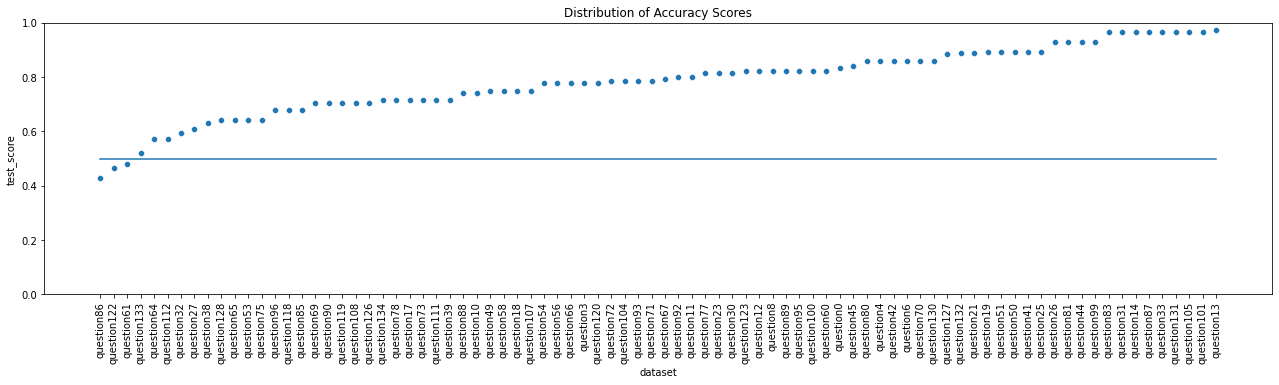

In [4]:
plt.figure(figsize = (22,5))
sns.scatterplot(
    data = scores.sort_values(by = 'test_score'),
    x = 'dataset',
    y = 'test_score'
)
sns.lineplot(
    x = scores.dataset,
    y = 0.5,
    
)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.title('Distribution of Accuracy Scores')
plt.show()

In [9]:
(scores.test_score > scores.test_score.mean()).sum()

48

In [10]:
(scores.test_score < scores.test_score.mean()).sum()

36

# Use PCA to Represent Data

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
pca = PCA(n_components = 1)
comps = pca.fit_transform(nlp.data)
print(pca.explained_variance_)
X_train, X_test, y_train, y_test = train_test_split(comps, nlp.doc.label, test_size = 0.5)

[1.39477916]


In [118]:
clf = LogisticRegression().fit(X_train, y_train)
pred = clf.predict(comps)
clf.score(X_test, y_test)

0.7368421052631579

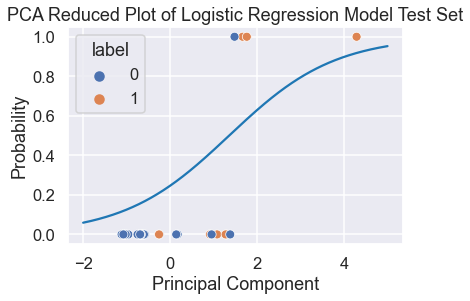

In [124]:
sns.set_style("darkgrid")
sns.set_context("talk")
sns.lineplot(
    x = line,
    y = line_pred[:,1],
)
sns.scatterplot(
    x = comps.ravel(),
    y = pred,
    hue = nlp.doc.label, 
    palette = "deep"
)

plt.title("PCA Reduced Plot of Logistic Regression Model Test Set")
plt.xlabel("Principal Component")
plt.ylabel("Probability")
plt.show()

In [30]:
max(comps)

array([4.2888814])

In [31]:
min(comps)

array([-1.11555762])

In [84]:
line = np.linspace(-2, 5, 1000)

In [85]:
line_pred = clf.predict_proba(line.reshape(-1,1))

In [74]:
line_pred

array([[0.94075007, 0.05924993],
       [0.94042769, 0.05957231],
       [0.94010368, 0.05989632],
       ...,
       [0.04802823, 0.95197177],
       [0.04776515, 0.95223485],
       [0.04750344, 0.95249656]])

In [88]:
X_test

array([[-0.67153324],
       [ 0.14122895],
       [ 4.2888814 ],
       [-1.02204649],
       [-0.65305181],
       [-1.03774026],
       [ 0.95472303],
       [ 1.29717094],
       [ 0.17261647],
       [-0.63449134],
       [ 1.6684036 ],
       [ 1.08080231],
       [-1.07374707],
       [-0.67153324],
       [ 0.15352686],
       [ 1.48149197],
       [-0.24136787],
       [ 1.27658384],
       [-0.70285684]])